In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import folium

In [2]:
excel_file = Path("../data/ChallengeXHEC23022024.xlsx")
schedule = pd.read_excel(excel_file, sheet_name=0)
clients = pd.read_excel(excel_file, sheet_name=1)
caregivers = pd.read_excel(excel_file, sheet_name=2)

# K-means on clients

In [3]:
map = folium.Map(
    location=[clients.Latitude.mean(), clients.Longitude.mean()],
    zoom_start=10,
    control_scale=True,
)
for index, location_info in clients.iterrows():
    folium.CircleMarker(
        [location_info["Latitude"], location_info["Longitude"]],
        color="blue",
        fill_color="blue",
    ).add_to(map)

for index, location_info in caregivers.iterrows():
    folium.CircleMarker(
        [location_info["Latitude"], location_info["Longitude"]],
        color="red",
        fill_color="red",
    ).add_to(map)

In [4]:
map

In [5]:
clients

,ID Client,Latitude,Longitude
0,559475456,48.721052,1.375689
1,559277088,48.721052,1.375689
2,87852633,48.691944,1.498773
3,243033408,48.726393,1.332848
4,814940942,48.733174,1.370689
...,...,...,...
113,334442311,48.771381,1.292168
114,621952854,48.742805,1.351704
115,1452858131,48.776801,1.370417
116,846949801,48.733484,1.371047


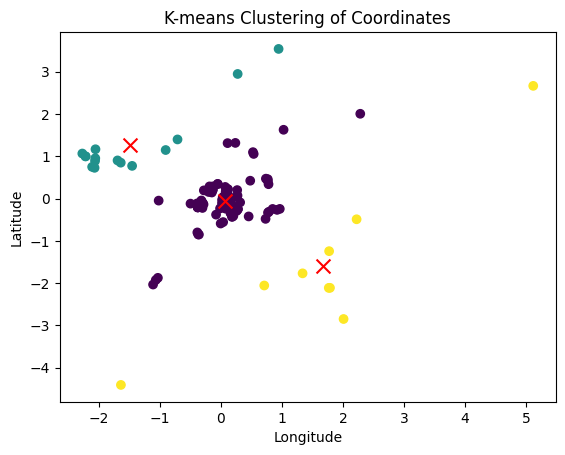

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example latitude and longitude data (replace with your own data)
coordinates = clients[["Latitude", "Longitude"]].values

# Feature scaling
# You can choose between standardization or normalization based on your data
# For example, using standardization:
mean = np.mean(coordinates, axis=0)
std = np.std(coordinates, axis=0)
scaled_coordinates = (coordinates - mean) / std

# Choose the number of clusters (k)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_coordinates)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.scatter(
    scaled_coordinates[:, 1],
    scaled_coordinates[:, 0],
    c=cluster_labels,
    cmap="viridis",
)
plt.scatter(
    cluster_centers[:, 1], cluster_centers[:, 0], marker="x", c="red", s=100
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-means Clustering of Coordinates")
plt.show()

In [7]:
map = folium.Map(
    location=[clients.Latitude.mean(), clients.Longitude.mean()],
    zoom_start=10,
    control_scale=True,
)
for index, location_info in clients.iterrows():
    folium.CircleMarker(
        [location_info["Latitude"], location_info["Longitude"]],
        color="blue",
        fill_color="blue",
    ).add_to(map)

for index, location_info in caregivers.iterrows():
    folium.CircleMarker(
        [location_info["Latitude"], location_info["Longitude"]],
        color="red",
        fill_color="red",
    ).add_to(map)

# Based on tasks assigned to clients, create properties
- How many different events a client has
- Total number of events a client has
-  What time of day a client has events

In [8]:
n_events_per_client = schedule.groupby("ID Client")["Prestation"].count()
n_unique_events_per_client = schedule.groupby("ID Client")["Prestation"].apply(
    lambda x: x.nunique()
)

# Client Personas (Question 3)

In [9]:
# Reload Data
file_path = "../data/ChallengeXHEC23022024.xlsx"


excel_data = pd.ExcelFile(file_path)


jan24_df = pd.read_excel(excel_data, sheet_name="JAN24")
clients_df = pd.read_excel(excel_data, sheet_name="clients")
intervenants_df = pd.read_excel(excel_data, sheet_name="intervenants")

In [10]:
# Analyzing client data to create personas
paris_center_coords = {"Latitude": 48.864716, "Longitude": 2.349014}

# Calculating the distance of each client from the Paris city center
clients_df["Distance from Paris Center"] = (
    (clients_df["Latitude"] - paris_center_coords["Latitude"]) ** 2
    + (clients_df["Longitude"] - paris_center_coords["Longitude"]) ** 2
) ** 0.5
client_service_summary = (
    jan24_df.groupby("ID Client")["Prestation"]
    .value_counts()
    .unstack(fill_value=0)
)
combined_client_data = clients_df.join(client_service_summary, on="ID Client")
combined_client_data["Distance from Paris Center"] = clients_df[
    "Distance from Paris Center"
]

In [26]:
# Persona A: Central City Dweller Needing Regular Meals
persona_a_clients = combined_client_data[
    (
        combined_client_data["Distance from Paris Center"]
        <= combined_client_data["Distance from Paris Center"].quantile(0.25)
    )
    & (combined_client_data["REPAS"] > 0)
]# .head()


persona_a_clients

,ID Client,Latitude,Longitude,Distance from Paris Center,ACCOMPAGNEMENTS COURSES PA,ADMINISTRATION,AIDE MENAGERE,COORDINATION,FEMME DE MENAGE,FORMATION,GARDE D'ENFANTS,HOMMES TOUTES MAINS,REPAS,TOILETTE,VIE SOCIALE,VISITE MEDICALE
19,446362468,48.725138,1.436412,0.923214,9,0,6,0,0,0,0,0,58,31,5,0
24,658302934,48.739911,1.382565,0.974474,2,0,4,1,0,1,0,0,31,31,0,0
29,466678534,48.747188,1.421348,0.935081,4,0,5,0,0,0,0,0,37,23,0,0
39,560575760,48.850785,1.434905,0.914215,0,0,7,1,0,0,0,1,27,7,0,0
42,458296232,48.748881,1.418857,0.937342,0,0,0,0,0,0,0,0,21,47,0,0
58,463037458,48.768307,1.403410,0.950506,0,0,0,0,0,0,0,0,8,1,0,0
72,78865175,48.663132,1.499835,0.872778,4,0,3,0,0,0,0,0,26,14,0,0
83,657893693,48.821772,1.756772,0.593797,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
# Persona B: Suburban Senior with Mobility Assistance Needs
persona_b_clients = combined_client_data[
    (
        combined_client_data["Distance from Paris Center"]
        > combined_client_data["Distance from Paris Center"].quantile(0.25)
    )
    & (
        combined_client_data["Distance from Paris Center"]
        <= combined_client_data["Distance from Paris Center"].quantile(0.75)
    )
    & (combined_client_data["TOILETTE"] > 0)
]

persona_b_clients

,ID Client,Latitude,Longitude,Distance from Paris Center,ACCOMPAGNEMENTS COURSES PA,ADMINISTRATION,AIDE MENAGERE,COORDINATION,FEMME DE MENAGE,FORMATION,GARDE D'ENFANTS,HOMMES TOUTES MAINS,REPAS,TOILETTE,VIE SOCIALE,VISITE MEDICALE
0,559475456,48.721052,1.375689,0.983870,0,0,0,0,0,0,0,0,61,31,0,0
1,559277088,48.721052,1.375689,0.983870,0,0,4,0,0,0,0,0,62,31,0,0
4,814940942,48.733174,1.370689,0.987128,0,0,0,0,0,0,0,0,14,29,0,0
7,480337694,48.729735,1.339050,1.018944,0,0,0,0,0,0,0,0,25,13,0,0
10,315244686,48.732218,1.363744,0.994140,0,0,5,0,0,0,0,0,22,62,0,0
12,522099746,48.729059,1.374504,0.983907,0,0,8,0,0,0,0,0,62,31,0,0
14,552306887,48.729613,1.374863,0.983475,0,0,0,0,0,0,0,0,0,54,8,0
16,714782168,48.740158,1.369426,0.987475,0,0,0,0,0,2,0,0,31,31,0,0
17,712664807,48.736134,1.370889,0.986540,0,0,4,0,0,0,0,0,0,31,0,0
18,803656603,48.723600,1.382000,0.977256,0,0,4,0,0,0,0,0,0,62,0,0


In [28]:
# Persona C: Remote Client Needing Weekly Check-ins
persona_c_clients = combined_client_data[
    (
        combined_client_data["Distance from Paris Center"]
        > combined_client_data["Distance from Paris Center"].quantile(0.75)
    )
    & (combined_client_data["REPAS"] <= 2)
]

persona_c_clients

,ID Client,Latitude,Longitude,Distance from Paris Center,ACCOMPAGNEMENTS COURSES PA,ADMINISTRATION,AIDE MENAGERE,COORDINATION,FEMME DE MENAGE,FORMATION,GARDE D'ENFANTS,HOMMES TOUTES MAINS,REPAS,TOILETTE,VIE SOCIALE,VISITE MEDICALE
5,864411156,48.766414,1.190890,1.162288,0,0,0,1,0,0,0,0,0,62,0,0
8,861502972,48.766414,1.190890,1.162288,0,0,0,0,0,0,0,0,0,17,0,0
20,859852985,48.762767,1.202870,1.150670,0,0,0,0,0,0,0,0,0,31,0,0
23,867813356,48.669269,1.279635,1.087093,0,0,0,0,0,3,0,0,0,62,0,0
27,762149315,48.768625,1.186807,1.166173,0,0,0,0,0,0,0,0,0,9,0,0
34,477580072,48.758134,1.199216,1.154728,0,0,0,0,0,0,0,0,0,7,0,0
35,78691334,48.705077,1.333307,1.028176,4,0,13,0,0,0,0,0,0,0,0,0
43,531956083,48.706659,1.332192,1.029033,0,0,5,0,0,0,0,0,0,0,0,0
45,691319767,48.729469,1.332017,1.025951,4,0,8,0,0,1,0,0,0,0,6,0
46,197278699,48.586883,1.235595,1.147560,0,0,5,0,0,0,0,0,0,0,0,0


In [30]:
jan24_df["Start Hour"] = jan24_df["Heure de début"].apply(lambda x: x.hour)
jan24_df["End Hour"] = jan24_df["Heure de fin"].apply(lambda x: x.hour)

# Persona E:  Adults Needing Evening Assistance (services post 5 PM)
persona_e_clients = (
    jan24_df[jan24_df["Start Hour"] >= 17]["ID Client"]
    .value_counts()
    .head()
    .index.tolist()
)
persona_e_clients

[87852633, 794098228, 541258495, 867813356, 658302934]

In [31]:
jan24_df["Day of Week"] = jan24_df["Date"].dt.dayofweek
# Persona F: Weekend Assistance Client (services on weekends)
persona_f_clients = (
    jan24_df[jan24_df["Day of Week"] >= 5]["ID Client"]
    .value_counts()
    .head()
    .index.tolist()
)
persona_f_clients

[87852633, 541258495, 559475456, 559277088, 522099746]

In [16]:
# Persona H: Clients Needing Frequent Short Visits (Services less than or equal to 1 hour)
jan24_df["Service Duration"] = jan24_df["End Hour"] - jan24_df["Start Hour"]
short_duration_clients = jan24_df[jan24_df["Service Duration"] <= 1]
persona_h_clients = (
    short_duration_clients["ID Client"].value_counts().head().index.tolist()
)

In [17]:
# Persona I: Early Morning Service Client (services before 8 AM)
early_morning_clients = jan24_df[jan24_df["Start Hour"] < 8]
persona_i_clients = (
    early_morning_clients["ID Client"].value_counts().head().index.tolist()
)

In [33]:
# Persona J: High Frequency Care Recipient (multiple services throughout the day)
high_frequency_clients = jan24_df["ID Client"].value_counts()
persona_j_clients = high_frequency_clients[
    high_frequency_clients > high_frequency_clients.quantile(0.75)
].index.tolist()  # [:5]
persona_j_clients

[87852633,
 446362468,
 192451998,
 522099746,
 559277088,
 541258495,
 794098228,
 559475456,
 530138806,
 315244686,
 99999999,
 658302934,
 466678534,
 458296232,
 803656603,
 78899980,
 817127257,
 867813356,
 714782168,
 864411156,
 552306887,
 78691461,
 78865175,
 560575760,
 814940942,
 658187452,
 197274024,
 480337694,
 522610892,
 751920795]

In [34]:
# Persona K: Infrequent, but Long Duration Visits (longer duration, fewer appointments)
long_duration_clients = jan24_df[
    jan24_df["Service Duration"] > jan24_df["Service Duration"].quantile(0.75)
]
infrequent_long_duration_clients = long_duration_clients[
    "ID Client"
].value_counts()
persona_k_clients = infrequent_long_duration_clients[
    infrequent_long_duration_clients
    < infrequent_long_duration_clients.quantile(0.25)
].index.tolist()

persona_k_clients

KeyError: 'Service Duration'

In [20]:
# Persona L: Clients with Varied Service Needs (diverse types of services)
varied_service_clients = client_service_summary[
    client_service_summary > 0
].count(axis=1)
persona_l_clients = varied_service_clients[
    varied_service_clients > varied_service_clients.quantile(0.75)
].index.tolist()[:5]

# Generate Random Clients

In [21]:
client_groups = {
    "a": persona_a_clients["ID Client"].to_list(),
    "b": persona_b_clients["ID Client"].to_list(),
    "c": persona_c_clients["ID Client"].to_list(),
    "e": persona_e_clients,
    "f": persona_f_clients,
    "h": persona_h_clients,
    "j": persona_j_clients,
    "k": persona_k_clients,
    "l": persona_l_clients,
}
client_groups

{'a': [446362468, 658302934, 466678534, 560575760, 458296232],
 'b': [559475456, 559277088, 814940942, 480337694, 315244686],
 'c': [864411156, 861502972, 859852985, 867813356, 762149315],
 'e': [87852633, 794098228, 541258495, 867813356, 658302934],
 'f': [87852633, 541258495, 559475456, 559277088, 522099746],
 'h': [87852633, 446362468, 192451998, 522099746, 794098228],
 'j': [87852633, 446362468, 192451998, 522099746, 559277088],
 'k': [438309694, 192451998, 334442311, 1452740690, 352744112],
 'l': [78691461, 78865175, 87274454, 87852633, 192451998]}

In [22]:
def find_key(dictionary, value):
    for key, values in dictionary.items():
        if value in values:
            return key
    return np.nan  # If the value is not found in any list


# clients_df["client_group"] =
clients_df["client_persona"] = clients_df["ID Client"].apply(
    lambda x: find_key(client_groups, x)
)
clients_df

,ID Client,Latitude,Longitude,Distance from Paris Center,client_persona
0,559475456,48.721052,1.375689,0.983870,b
1,559277088,48.721052,1.375689,0.983870,b
2,87852633,48.691944,1.498773,0.867617,e
3,243033408,48.726393,1.332848,1.025537,NaN
4,814940942,48.733174,1.370689,0.987128,b
...,...,...,...,...,...
113,334442311,48.771381,1.292168,1.060959,k
114,621952854,48.742805,1.351704,1.004734,NaN
115,1452858131,48.776801,1.370417,0.982538,NaN
116,846949801,48.733484,1.371047,0.986733,NaN


# Generate Random Sessions from Clients
- From clients in the similar group, create a client using random properties of them
- Groupby client group and prestation. Find the number of times these events occured. According to the average number of times it has occured during the period. Create these events by random.


In [23]:
"""jan24_df["Heure de début"] = pd.to_datetime(
        jan24_df["Date"].astype(str)
        + " "
        + jan24_df["Heure de début"].astype(str)
    )
jan24_df["Heure de fin"] = pd.to_datetime(
    jan24_df["Date"].astype(str)
    + " "
    + jan24_df["Heure de fin"].astype(str)
)

# create session duration in minutes
jan24_df["Duration"] = (
    jan24_df["Heure de fin"] - jan24_df["Heure de début"]
)
jan24_df["Duration"] = jan24_df["Duration"].apply(
    lambda x: x.seconds // 60
)

# create start time in minutes
jan24_df["Start_time"] = (
    jan24_df["Heure de début"] - pd.to_datetime(jan24_df["Date"])
).dt.seconds
jan24_df["Start_time"] = jan24_df["Start_time"].apply(lambda x: x // 60)

jan24_df["End_time"] = jan24_df["Start_time"] + jan24_df["Duration"]
"""
jan24_df = pd.read_excel(excel_data, sheet_name="JAN24")
df = pd.merge(jan24_df, clients_df, how="left", on="ID Client")
df

,ID Client,ID Intervenant,Date,Heure de début,Heure de fin,Prestation,Latitude,Longitude,Distance from Paris Center,client_persona
0,559475456,162858075,2024-01-01,07:15:00,07:45:00,REPAS,48.721052,1.375689,0.983870,b
1,559277088,162858075,2024-01-01,07:45:00,08:30:00,TOILETTE,48.721052,1.375689,0.983870,b
2,87852633,78007018,2024-01-01,07:45:00,08:30:00,TOILETTE,48.691944,1.498773,0.867617,e
3,243033408,810259688,2024-01-01,07:45:00,08:15:00,TOILETTE,48.726393,1.332848,1.025537,NaN
4,814940942,710283561,2024-01-01,07:45:00,09:20:00,TOILETTE,48.733174,1.370689,0.987128,b
...,...,...,...,...,...,...,...,...,...,...
2865,559277088,710283561,2024-01-31,19:00:00,19:15:00,REPAS,48.721052,1.375689,0.983870,b
2866,714782168,810259688,2024-01-31,19:00:00,20:00:00,REPAS,48.740158,1.369426,0.987475,NaN
2867,559475456,710283561,2024-01-31,19:15:00,20:00:00,TOILETTE,48.721052,1.375689,0.983870,b
2868,803656603,854577575,2024-01-31,19:20:00,19:50:00,TOILETTE,48.723600,1.382000,0.977256,NaN


In [25]:
# Get Count of event per client persona
# n_events_per_persona = df.groupby("client_persona")["Prestation"].count() // 5

# Get frequency of event by client persona and prestation
event_frequencies = (
    df.groupby(["client_persona", "Date"])["Prestation"].value_counts() // 5
    + 1
)
event_frequencies.groupby(level=0).sum()

client_persona
a    137
b    119
c     65
e    129
f     70
h     72
k     11
l     72
Name: count, dtype: int64

- For each persona type, we write a function that:
    - Generates a new client ID
    - Randomly chooses the location from one of the clients 
    - Generates similar number of events for every persona - client combo (Uniform random that has +-3 events)
    - For each event, chooses a pre-existing time and adds a +- 30 minute uniform to start time and multiplies the duration with a random factor
- Add client ID and Coordinates to clients_df
- Add All sessions to dataframe

In [58]:
persona_group = "c"

df_clients = pd.read_excel("../data/ChallengeXHEC23022024.xlsx", sheet_name=1)
df_sessions = pd.read_excel("../data/ChallengeXHEC23022024.xlsx", sheet_name=0)
df_persona = df[df["client_persona"] == persona_group].copy()


# Generate key for new client
new_client_id = np.random.randint(10000000, 100000000)

# Take a random location for client
client_loc = df_persona[["Latitude", "Longitude"]].sample(1).to_dict()
client_loc = {k: list(v.values())[0] for k, v in client_loc.items()}

# Join new client to client dataset
new_client = pd.DataFrame(
    {"ID Client": new_client_id} | client_loc, index=[len(df_clients)]
)
new_df_clients = pd.concat([df_clients, new_client])

# Get event freqs
freqs = event_frequencies.loc[persona_group].apply(
    lambda x: max(1, x + np.random.randint(-1, 1))
)


# Generate a random event until all events are complete
new_events = pd.DataFrame(columns=df_sessions.columns)


## Choose a random event start time
for (date, prest), count in freqs.to_frame().iterrows():
    # display(i[1], count.iloc[0])
    count = count.iloc[0]

    # Don't need to implement the above
    # Convert time to same format as Heure de debut after randomly adding a term to it
    # times = df_persona[df_persona["Prestation"]==prest][["Start_time", "Duration"]].sample(count)

    times = df_persona[df_persona["Prestation"] == prest][
        ["Heure de début", "Heure de fin"]
    ].sample(count)

    new_row = pd.DataFrame(
        {
            "ID Client": [new_client_id] * count,
            "ID Intervenant": [
                intervenants_df["ID Intervenant"].sample(1).iloc[0]
            ]
            * count,
            "Date": [date] * count,
            "Heure de début": times["Heure de début"].to_list(),
            "Heure de fin": times["Heure de fin"].to_list(),
            "Prestation": [prest] * count,
        }
    )

    new_events = pd.concat([new_events, new_row])


new_df_sessions = (
    pd.concat([df_sessions, new_events])
    .sort_values(by="Date")
    .reset_index(drop=True)
)
new_df_sessions

/var/folders/02/4dhz5d9x1k994lg22tygy0zh0000gn/T/ipykernel_1544/2085245621.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_events = pd.concat([new_events, new_row])


,ID Client,ID Intervenant,Date,Heure de début,Heure de fin,Prestation
0,559475456,162858075,2024-01-01,07:15:00,07:45:00,REPAS
1,559475456,78007018,2024-01-01,12:00:00,12:45:00,REPAS
2,446362468,856089133,2024-01-01,12:00:00,12:30:00,REPAS
3,243033408,810259688,2024-01-01,12:00:00,12:30:00,REPAS
4,541258495,480302361,2024-01-01,12:05:00,12:35:00,REPAS
...,...,...,...,...,...,...
2910,560575760,162858075,2024-01-31,10:45:00,11:45:00,REPAS
2911,762304005,854577575,2024-01-31,10:45:00,11:45:00,ACCOMPAGNEMENTS COURSES PA
2912,88588548,810259688,2024-01-31,10:40:00,11:40:00,TOILETTE
2913,463037458,842621873,2024-01-31,12:10:00,12:55:00,REPAS


In [59]:
def find_key(dictionary, value):
    for key, values in dictionary.items():
        if value in values:
            return key
    return np.nan  # If the value is not found in any list


def get_client_segments(file_path: str = "../data/ChallengeXHEC23022024.xlsx"):
    excel_data = pd.ExcelFile(file_path)
    jan24_df = pd.read_excel(excel_data, sheet_name="JAN24")
    clients_df = pd.read_excel(excel_data, sheet_name="clients")

    # Analyzing client data to create personas
    paris_center_coords = {"Latitude": 48.864716, "Longitude": 2.349014}

    # Calculating the distance of each client from the Paris city center
    clients_df["Distance from Paris Center"] = (
        (clients_df["Latitude"] - paris_center_coords["Latitude"]) ** 2
        + (clients_df["Longitude"] - paris_center_coords["Longitude"]) ** 2
    ) ** 0.5
    client_service_summary = (
        jan24_df.groupby("ID Client")["Prestation"]
        .value_counts()
        .unstack(fill_value=0)
    )
    combined_client_data = clients_df.join(
        client_service_summary, on="ID Client"
    )
    combined_client_data["Distance from Paris Center"] = clients_df[
        "Distance from Paris Center"
    ]

    # Persona A: Central City Dweller Needing Regular Meals
    persona_a_clients = combined_client_data[
        (
            combined_client_data["Distance from Paris Center"]
            <= combined_client_data["Distance from Paris Center"].quantile(
                0.25
            )
        )
        & (combined_client_data["REPAS"] > 0)
    ].head()

    # Persona B: Suburban Senior with Mobility Assistance Needs
    persona_b_clients = combined_client_data[
        (
            combined_client_data["Distance from Paris Center"]
            > combined_client_data["Distance from Paris Center"].quantile(0.25)
        )
        & (
            combined_client_data["Distance from Paris Center"]
            <= combined_client_data["Distance from Paris Center"].quantile(
                0.75
            )
        )
        & (combined_client_data["TOILETTE"] > 0)
    ].head()

    # Persona C: Remote Client Needing Weekly Check-ins
    persona_c_clients = combined_client_data[
        (
            combined_client_data["Distance from Paris Center"]
            > combined_client_data["Distance from Paris Center"].quantile(0.75)
        )
        & (combined_client_data["REPAS"] <= 2)
    ].head()

    jan24_df["Start Hour"] = jan24_df["Heure de début"].apply(lambda x: x.hour)
    jan24_df["End Hour"] = jan24_df["Heure de fin"].apply(lambda x: x.hour)

    # Persona E:  Adults Needing Evening Assistance (services post 5 PM)
    persona_e_clients = (
        jan24_df[jan24_df["Start Hour"] >= 17]["ID Client"]
        .value_counts()
        .head()
        .index.tolist()
    )
    jan24_df["Day of Week"] = jan24_df["Date"].dt.dayofweek
    # Persona F: Weekend Assistance Client (services on weekends)
    persona_f_clients = (
        jan24_df[jan24_df["Day of Week"] >= 5]["ID Client"]
        .value_counts()
        .head()
        .index.tolist()
    )

    # Persona H: Clients Needing Frequent Short Visits (Services less than or equal to 1 hour)
    jan24_df["Service Duration"] = (
        jan24_df["End Hour"] - jan24_df["Start Hour"]
    )
    short_duration_clients = jan24_df[jan24_df["Service Duration"] <= 1]
    persona_h_clients = (
        short_duration_clients["ID Client"]
        .value_counts()
        .head()
        .index.tolist()
    )
    # Persona I: Early Morning Service Client (services before 8 AM)
    early_morning_clients = jan24_df[jan24_df["Start Hour"] < 8]
    persona_i_clients = (
        early_morning_clients["ID Client"].value_counts().head().index.tolist()
    )

    # Persona J: High Frequency Care Recipient (multiple services throughout the day)
    high_frequency_clients = jan24_df["ID Client"].value_counts()
    persona_j_clients = high_frequency_clients[
        high_frequency_clients > high_frequency_clients.quantile(0.75)
    ].index.tolist()[:5]
    # Persona K: Infrequent, but Long Duration Visits (longer duration, fewer appointments)
    long_duration_clients = jan24_df[
        jan24_df["Service Duration"]
        > jan24_df["Service Duration"].quantile(0.75)
    ]
    infrequent_long_duration_clients = long_duration_clients[
        "ID Client"
    ].value_counts()
    persona_k_clients = infrequent_long_duration_clients[
        infrequent_long_duration_clients
        < infrequent_long_duration_clients.quantile(0.25)
    ].index.tolist()[:5]

    # Persona L: Clients with Varied Service Needs (diverse types of services)
    varied_service_clients = client_service_summary[
        client_service_summary > 0
    ].count(axis=1)
    persona_l_clients = varied_service_clients[
        varied_service_clients > varied_service_clients.quantile(0.75)
    ].index.tolist()[:5]

    client_groups = {
        "a": persona_a_clients["ID Client"].to_list(),
        "b": persona_b_clients["ID Client"].to_list(),
        "c": persona_c_clients["ID Client"].to_list(),
        "e": persona_e_clients,
        "f": persona_f_clients,
        "h": persona_h_clients,
        "i": persona_i_clients,
        "j": persona_j_clients,
        "k": persona_k_clients,
        "l": persona_l_clients,
    }

    clients_df["client_persona"] = clients_df["ID Client"].apply(
        lambda x: find_key(client_groups, x)
    )
    return clients_df


def generate_random_sessions(
    persona_group: str,
    df_client_with_persona: pd.DataFrame,
    df_clients: pd.DataFrame,
    df_sessions: pd.DataFrame,
    df_caregivers: pd.DataFrame,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """Generate new clients and add it into the raw dataset.

    Args:
        persona_group (str): One of the possible persona segments created
        df_client_with_persona (pd.DataFrame): Output from get_client_segments.
            Similar to client sessions but contains persona column
        df_clients (pd.DataFrame): raw clients data from excel sheet
        df_sessions (pd.DataFrame): raw sessions data from excel sheet
        df_caregivers (pd.DataFrame): raw caregivers data from excel sheet

    Returns:
        tuple[pd.DataFrame, pd.DataFrame]: new client data and new sessions data
    """

    df_persona = df_client_with_persona[
        df_client_with_persona["client_persona"] == persona_group
    ].copy()

    df = pd.merge(df_sessions, df_persona, how="left", on="ID Client")

    # Generate event frequencies for the client persona
    event_frequencies = (
        df.groupby(["client_persona", "Date"])["Prestation"].value_counts()
        // 5
        + 1
    )

    # Generate key for new client
    new_client_id = np.random.randint(10000000, 100000000)

    # Take a random location for client
    client_loc = df_persona[["Latitude", "Longitude"]].sample(1).to_dict()
    client_loc = {k: list(v.values())[0] for k, v in client_loc.items()}

    # Join new client to client dataset
    new_client = pd.DataFrame(
        {"ID Client": new_client_id} | client_loc, index=[len(df_clients)]
    )
    new_df_clients = pd.concat([df_clients, new_client])

    # Get event freqs
    freqs = event_frequencies.loc[persona_group].apply(
        lambda x: max(1, x + np.random.randint(-1, 1))
    )

    # Generate a random event until all events are complete
    new_events = pd.DataFrame(columns=df_sessions.columns)

    ## Choose a random event start time
    for (date, prest), count in freqs.to_frame().iterrows():
        # display(i[1], count.iloc[0])
        count = count.iloc[0]

        times = df[df["Prestation"] == prest][
            ["Heure de début", "Heure de fin"]
        ].sample(count)

        new_row = pd.DataFrame(
            {
                "ID Client": [new_client_id] * count,
                "ID Intervenant": [
                    df_caregivers["ID Intervenant"].sample(1).iloc[0]
                ]
                * count,
                "Date": [date] * count,
                "Heure de début": times["Heure de début"].to_list(),
                "Heure de fin": times["Heure de fin"].to_list(),
                "Prestation": [prest] * count,
            }
        )

        new_events = pd.concat([new_events, new_row])

    new_df_sessions = (
        pd.concat([df_sessions, new_events])
        .sort_values(by="Date")
        .reset_index(drop=True)
    )

    return new_df_clients, new_df_sessions

# Run this to get new clients.

In [63]:
# Adding Clients
df_clients = pd.read_excel("../data/ChallengeXHEC23022024.xlsx", sheet_name=1)
df_sessions = pd.read_excel("../data/ChallengeXHEC23022024.xlsx", sheet_name=0)

client_segments = get_client_segments()
df_clients, df_sessions = generate_random_sessions(
    "a",
    client_segments,
    df_clients,
    df_sessions,
    df_caregivers=intervenants_df,
)
df_clients, df_sessions = generate_random_sessions(
    "c",
    client_segments,
    df_clients,
    df_sessions,
    df_caregivers=intervenants_df,
)
df_clients, df_sessions = generate_random_sessions(
    "h",
    client_segments,
    df_clients,
    df_sessions,
    df_caregivers=intervenants_df,
)

/var/folders/02/4dhz5d9x1k994lg22tygy0zh0000gn/T/ipykernel_1544/3724842710.py:227: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_events = pd.concat([new_events, new_row])
/var/folders/02/4dhz5d9x1k994lg22tygy0zh0000gn/T/ipykernel_1544/3724842710.py:227: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_events = pd.concat([new_events, new_row])
/var/folders/02/4dhz5d9x1k994lg22tygy0zh0000gn/T/ipykernel_1544/3724842710.py:227: FutureWarning: The behavior of DataFrame concatenation with empty o

In [64]:
all_personas = ["a", "b", "c", "e", "f", "h", "i", "j", "k", "l"]


def add_new_clients_and_sessions(
    n_clients: int,
    random_client_segment: bool = False,
    client_personas_sequence: list[str] = None,
    all_personas: list[str] = [
        "a",
        "b",
        "c",
        "e",
        "f",
        "h",
        "i",
        "j",
        "k",
        "l",
    ],
    excel_file: str = "../data/ChallengeXHEC23022024.xlsx"
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """Add new clients to clients dataframe and new sessions based on these clients to sessions dataset

    Args:
        n_clients (int): number of clients to add
        random_client_segment (bool, optional): whether to add random segments of clients or fixed. Defaults to False.
        client_personas_sequence (list[str], optional): If random_client_segment is set to False A list of client segments
            that has the same length as n_clients to add must be specified. Defaults to None.
        all_personas (list[str], optional): List of all personas. Defaults to [ "a", "b", "c", "e", "f", "h", "i", "j", "k", "l", ].
        excel_file (str, optional): filepath for Excel document. Defaults to "../data/ChallengeXHEC23022024.xlsx".

    Returns:
        tuple[pd.DataFrame, pd.DataFrame]: Tuple of new Client DataFrame and new Sessions DataFrame
    """
    # Adding Clients
    df_clients = pd.read_excel(
        excel_file, sheet_name=1
    )
    intervenants_df = pd.read_excel(
       excel_file, sheet_name=2
    )
    df_sessions = pd.read_excel(
        excel_file, sheet_name=0
    )
    client_segments = get_client_segments()

    # If we want random segments of clients
    if random_client_segment:
        clients = np.random.choice(all_personas, n_clients)
        for client_persona in clients:
            df_clients, df_sessions = generate_random_sessions(
                client_persona,
                client_segments,
                df_clients,
                df_sessions,
                df_caregivers=intervenants_df,
            )
        return df_clients, df_sessions

    # If we want a fixed segment of clients
    # The length of the sequence must match the length of the n_clients we want to add
    assert n_clients == len(client_personas_sequence)
    
    for client_persona in client_personas_sequence:
        df_clients, df_sessions = generate_random_sessions(
            client_persona,
            client_segments,
            df_clients,
            df_sessions,
            df_caregivers=intervenants_df,
        )
    return df_clients, df_sessions


df_clients, df_sessions = add_new_clients_and_sessions(5, random_client_segment=True)

/var/folders/02/4dhz5d9x1k994lg22tygy0zh0000gn/T/ipykernel_1544/3724842710.py:227: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_events = pd.concat([new_events, new_row])
/var/folders/02/4dhz5d9x1k994lg22tygy0zh0000gn/T/ipykernel_1544/3724842710.py:227: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_events = pd.concat([new_events, new_row])
/var/folders/02/4dhz5d9x1k994lg22tygy0zh0000gn/T/ipykernel_1544/3724842710.py:227: FutureWarning: The behavior of DataFrame concatenation with empty o

In [65]:
df_sessions

,ID Client,ID Intervenant,Date,Heure de début,Heure de fin,Prestation
0,559475456,162858075,2024-01-01,07:15:00,07:45:00,REPAS
1,243033408,810259688,2024-01-01,12:00:00,12:30:00,REPAS
2,559277088,78007018,2024-01-01,11:45:00,12:00:00,REPAS
3,530138806,480302361,2024-01-01,12:50:00,13:20:00,REPAS
4,213156949,78007018,2024-01-01,09:45:00,10:15:00,TOILETTE
...,...,...,...,...,...,...
3126,522099746,710283561,2024-01-31,11:10:00,11:40:00,REPAS
3127,87852633,710283561,2024-01-31,17:00:00,17:15:00,VIE SOCIALE
3128,817127257,854577575,2024-01-31,16:45:00,17:45:00,AIDE MENAGERE
3129,590049071,480302361,2024-01-31,10:30:00,11:00:00,TOILETTE


# Test

- Generate random scenarios of clients for n_clients equal to 1,2,3,4,5
- Run the optimisation and see which ones have a feasible scenario

In [36]:
import os
os.chdir("..")
os.getcwd()

'/Users/Dell/Desktop/HEC/care-agenda-optimisation-1'

In [38]:
from src.client_generator import add_new_clients_and_sessions

df_clients, df_sessions = add_new_clients_and_sessions(5, excel_file= "data/ChallengeXHEC23022024.xlsx", random_client_segment=False, client_personas_sequence="abefk")

Adding for persona group:  a
Adding for persona group:  b
Adding for persona group:  e
Adding for persona group:  f
Adding for persona group:  k


/Users/Dell/Desktop/HEC/care-agenda-optimisation-1/src/client_generator.py:232: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_events = pd.concat([new_events, new_row])
/Users/Dell/Desktop/HEC/care-agenda-optimisation-1/src/client_generator.py:232: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_events = pd.concat([new_events, new_row])
/Users/Dell/Desktop/HEC/care-agenda-optimisation-1/src/client_generator.py:232: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA 

In [39]:
from src.dataloader import load_and_save_data

load_and_save_data(generate_new_clients=True, **{"n_clients": 5})

Adding for persona group:  b
Adding for persona group:  c
Adding for persona group:  l
Adding for persona group:  h
Adding for persona group:  k


In [4]:
import pandas as pd

In [40]:
pd.read_csv("data/schedule.csv")

,ID Client,Date,Heure de début,Heure de fin,Prestation,idx,Duration,Start_time
0,838320706,2024-01-01,2024-01-01 05:00:00,2024-01-01 05:00:00,COMMUTE,0,0,300
1,609468992,2024-01-01,2024-01-01 05:00:00,2024-01-01 05:00:00,COMMUTE,1,0,300
2,78012267,2024-01-01,2024-01-01 05:00:00,2024-01-01 05:00:00,COMMUTE,2,0,300
3,818696864,2024-01-01,2024-01-01 05:00:00,2024-01-01 05:00:00,COMMUTE,3,0,300
4,746414886,2024-01-01,2024-01-01 05:00:00,2024-01-01 05:00:00,COMMUTE,4,0,300
...,...,...,...,...,...,...,...,...
4514,1452747150,2024-01-31,2024-01-31 22:00:00,2024-01-31 22:00:00,COMMUTE,4514,0,1320
4515,162858075,2024-01-31,2024-01-31 22:00:00,2024-01-31 22:00:00,COMMUTE,4515,0,1320
4516,739888851,2024-01-31,2024-01-31 22:00:00,2024-01-31 22:00:00,COMMUTE,4516,0,1320
4517,648993440,2024-01-31,2024-01-31 22:00:00,2024-01-31 22:00:00,COMMUTE,4517,0,1320


In [41]:
from src.optimiser import main

main(include_availability=False, filter_for_competence=False)

Starting optimisation for 2024-01-01


IndexError: single positional indexer is out-of-bounds